# Import Libraries

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

### Dataset Description

  <b>Customer</b><br>                        
- ID: Customer's unique identifier<br>
- Year_Birth: Customer's birth year<br>
- Education: Customer's education level<br>
- Marital_Status: Customer's marital status<br>
- Income: Customer's yearly household income<br>
- Kidhome: Number of children in customer's household<br>
- Teenhome: Number of teenagers in customer's household<br>
- Dt_Customer: Date of customer's enrollment with the company<br>
- Recency: Number of days since customer's last purchase<br>
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise<br><br>

<b>Products</b>
- MntWines: Amount spent on wine in last 2 years<br>
- MntFruits: Amount spent on fruits in last 2 years<br>
- MntMeatProducts: Amount spent on meat in last 2 years<br>
- MntFishProducts: Amount spent on fish in last 2 years<br>
- MntSweetProducts: Amount spent on sweets in last 2 years<br>
- MntGoldProds: Amount spent on gold in last 2 years<br><br>

<b>Promotion</b><br>
- NumDealsPurchases: Number of purchases made with a discount<br>
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise<br>
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise<br>
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise<br>
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise<br>
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise<br>
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise<br><br>

<b>Place</b><br>
- NumWebPurchases: Number of purchases made through the company’s website<br>
- NumCatalogPurchases: Number of purchases made using a catalogue<br>
- NumStorePurchases: Number of purchases made directly in stores<br>
- NumWebVisitsMonth: Number of visits to company’s website in the last month<br>

In [60]:
df = pd.read_csv('new.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# BASIC EDA

In [61]:
df.shape

(2240, 29)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [63]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


# Checking Null Values

In [64]:
for col in df.columns:
	temp = df[col].isnull().sum()
	if temp > 0:
		print(f'Column {col} contains {temp} null values.')

Column Income contains 24 null values.


# As the missing number values is very less we can drop those values

In [65]:
df = df.dropna()
print("Total number of observations are:", len(df))

Total number of observations are: 2216


# Finding total number of unique values in each column

In [66]:
df.nunique()

ID                     2216
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             662
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         554
MntFishProducts         182
MntSweetProducts        176
MntGoldProds            212
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

# There are some columns which have only single type of values so obviously they will not help us in building the model

# Also Dt_Customer is a date column by which we can extract months years and day

In [67]:
parts = df["Dt_Customer"].str.split("-", n=3, expand=True)
df["day"] = parts[0].astype('int')
df["month"] = parts[1].astype('int')
df["year"] = parts[2].astype('int')

# Dropping unnecessary Features

In [68]:
df.drop(['Z_CostContact', 'Z_Revenue', 'Dt_Customer'],
		axis=1,
		inplace=True)

# Data visualization

In [69]:
data1=['Education', 'Marital_Status']
data2=['Income']

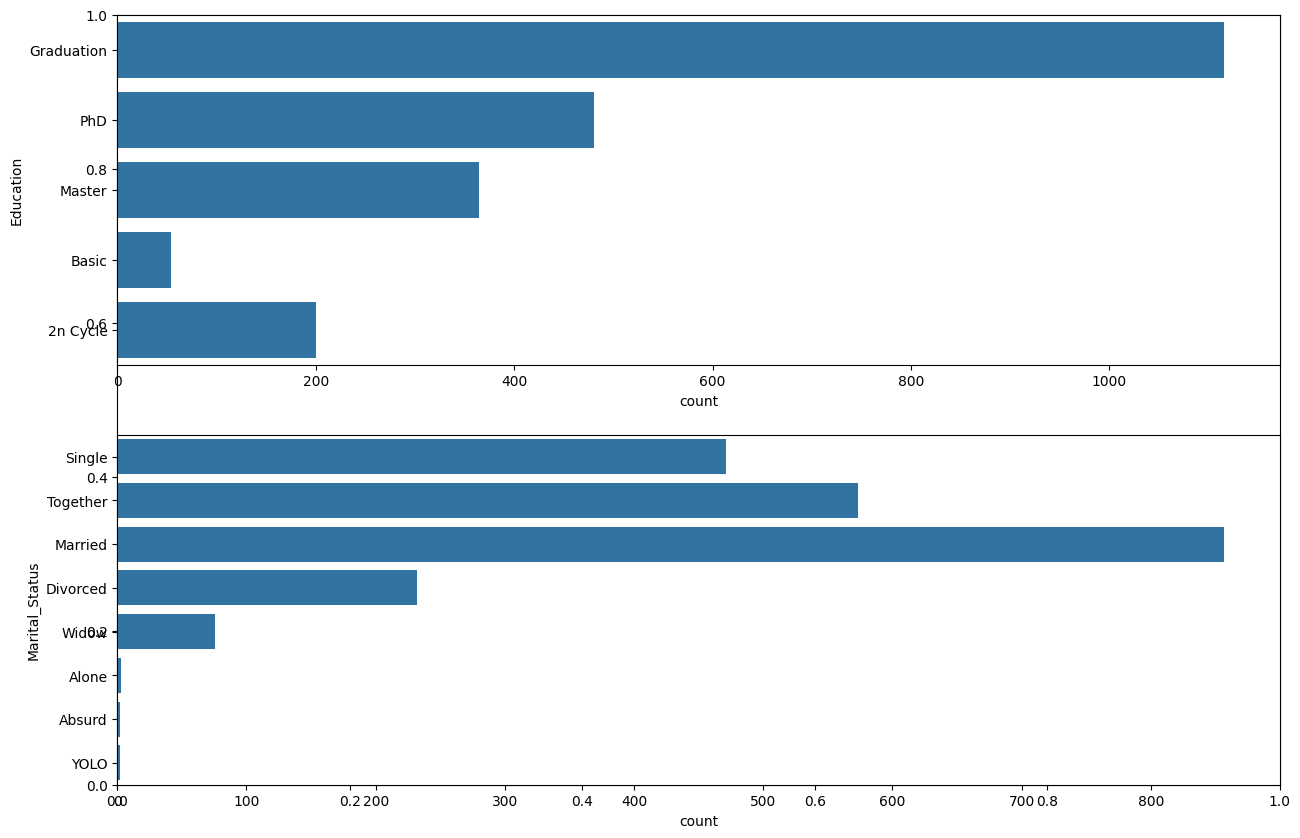

In [81]:
plt.subplots(figsize=(15, 10))
for i in range(len(data1)):
	plt.subplot(2, 1,i+1)
	sns.countplot(df[data1[i]])
plt.show()

In [ ]:
df['Marital_Status'].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

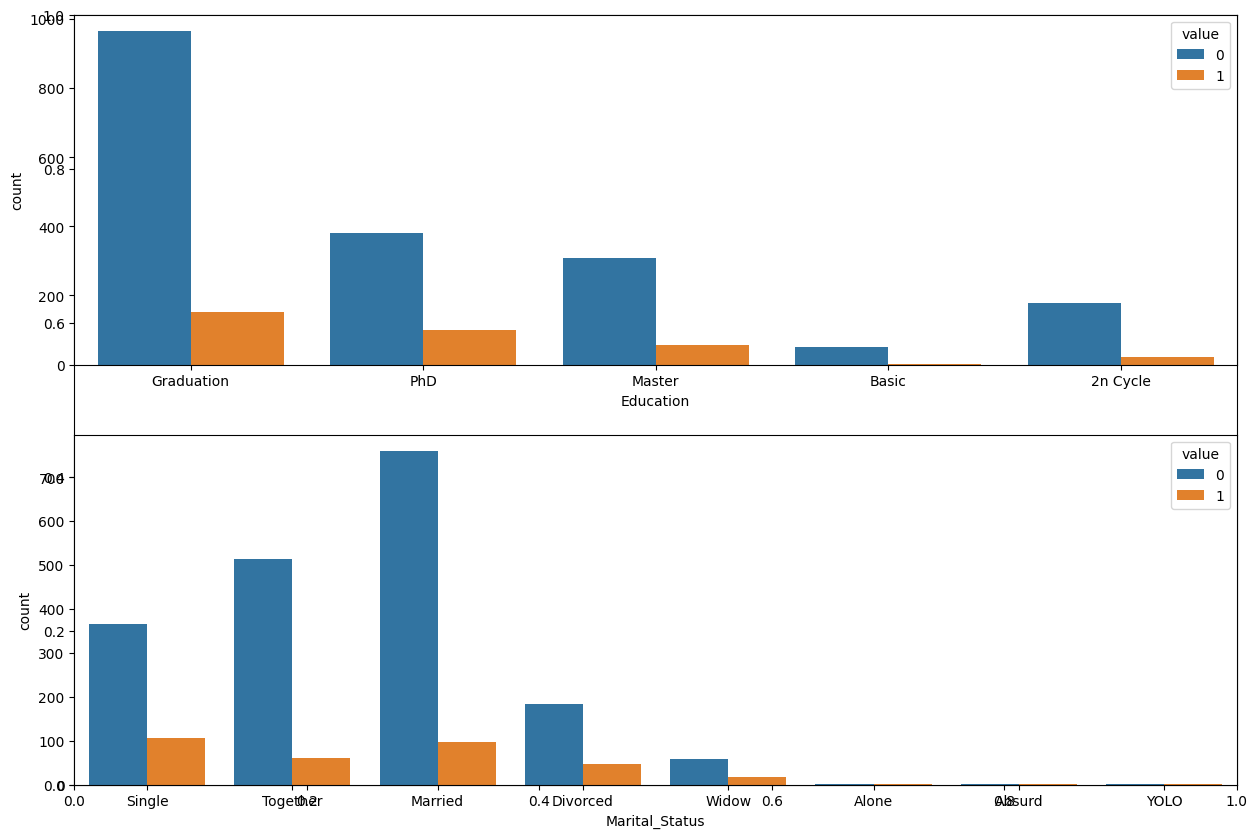

In [84]:
plt.subplots(figsize=(15, 10))
for i, col in enumerate(data1):
    plt.subplot(2, 1, i + 1)
    # Use melt to transform the data to long form
    df_melted = df.melt(id_vars=[col], value_vars=['Response'], var_name='hue')
    sns.countplot(x=col, hue='value', data=df_melted)
plt.show()

# Label Encoding

In [85]:
for col in df.columns:
	if df[col].dtype == object:
		le = LabelEncoder()
		df[col] = le.fit_transform(df[col])

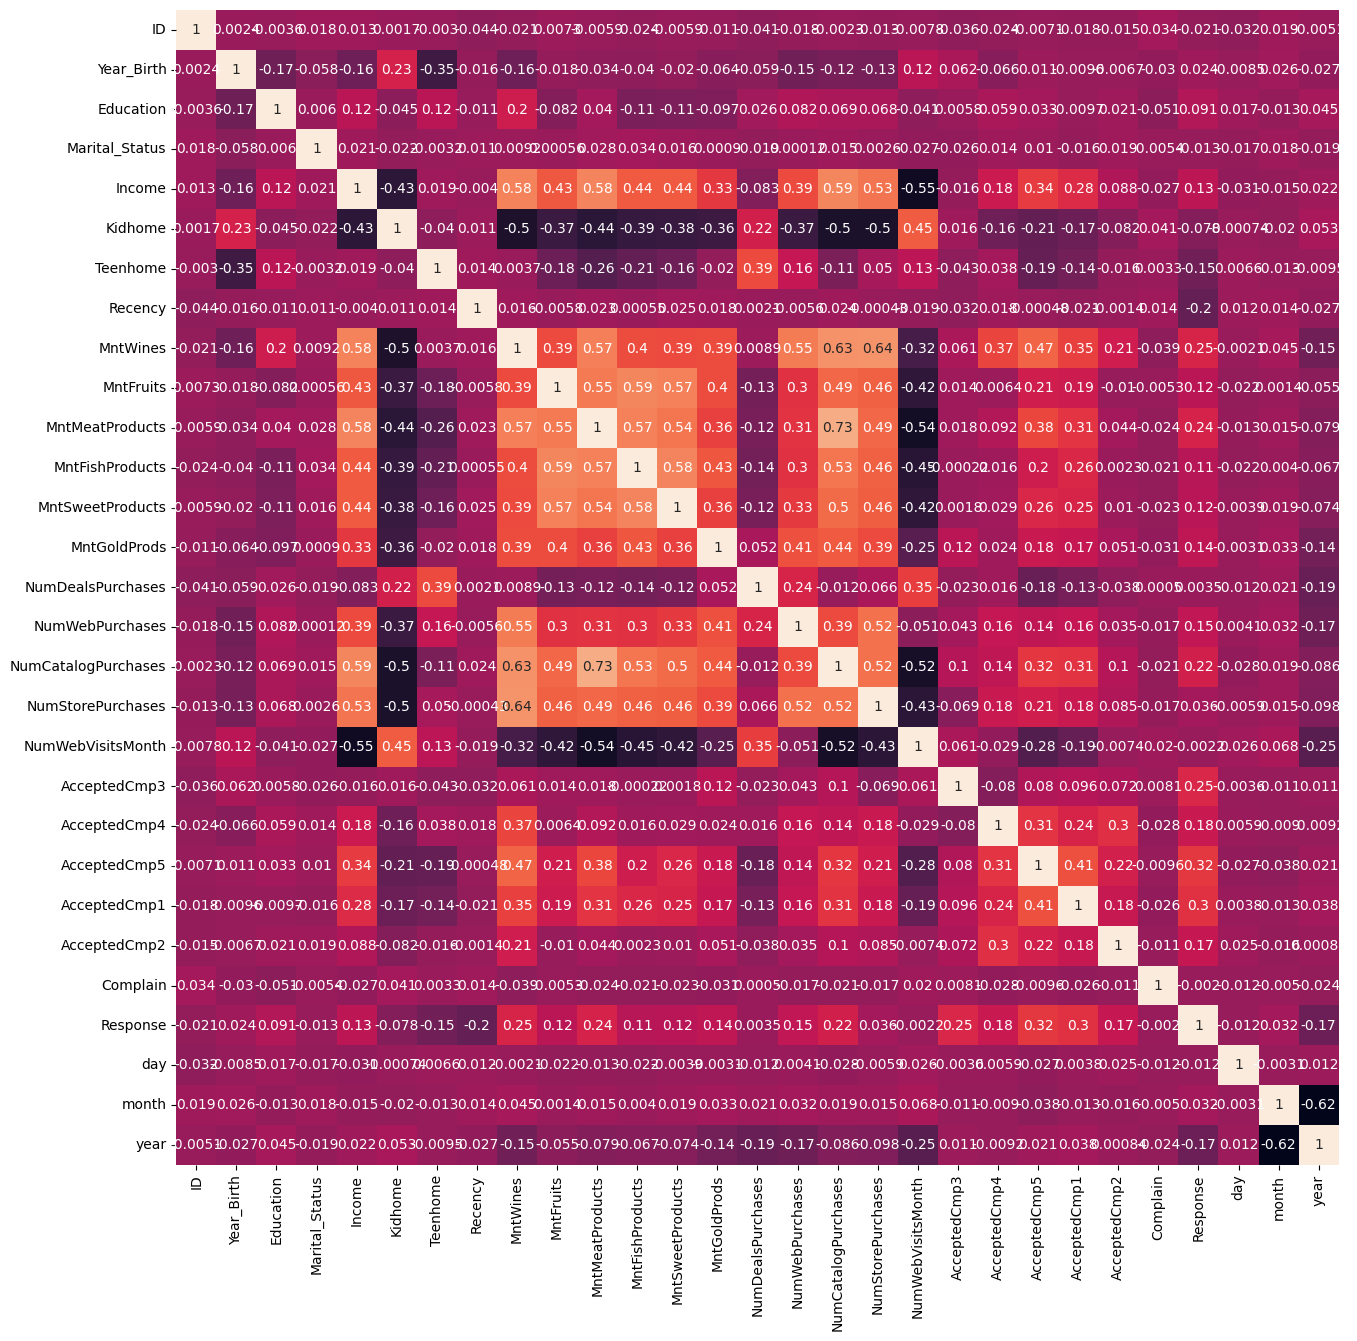

In [93]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, cbar=False)
plt.show()

# Standardization

In [87]:
scaler = StandardScaler()
data = scaler.fit_transform(df)

We will be using T-distributed Stochastic Neighbor Embedding. It helps in visualizing high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the values to low-dimensional embedding.

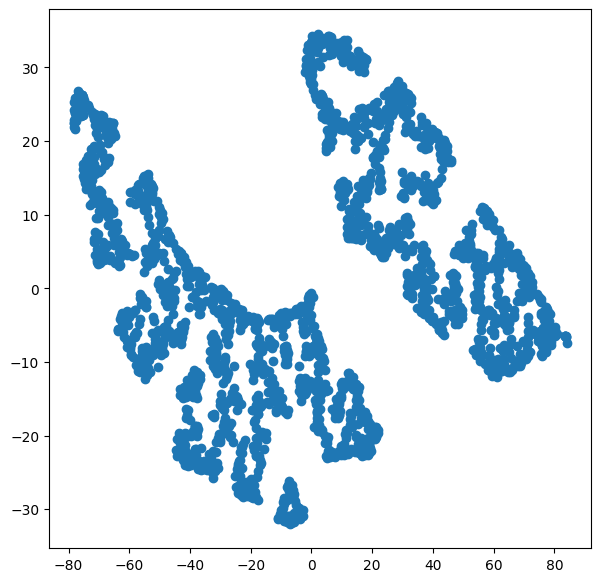

In [88]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(df)
plt.figure(figsize=(7, 7))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1])
plt.show()

There are certainly some clusters which are clearly visual from the 2-D representation of the given data. Let’s use the KMeans algorithm to find those clusters in the high dimensional plane itself

# K Means Clustering

In [89]:
error = []
for n_clusters in range(1, 21):
	model = KMeans(init='k-means++',
				n_clusters=n_clusters,
				max_iter=500,
				random_state=22)
	model.fit(df)
	error.append(model.inertia_)

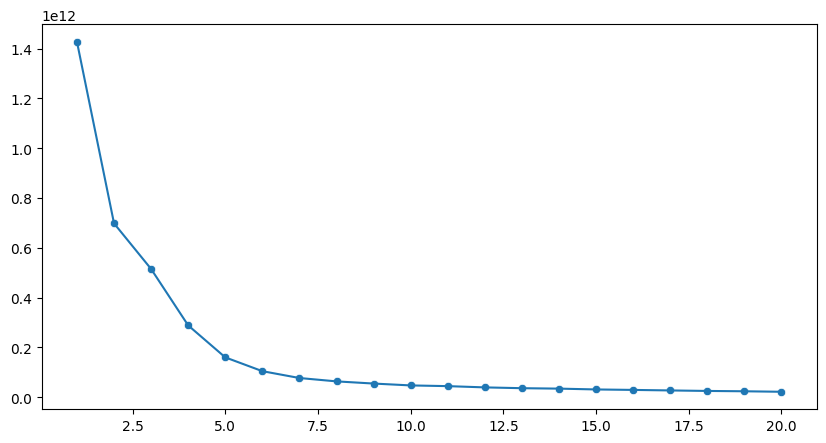

In [90]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=range(1, 21), y=error)
sns.scatterplot(x=range(1, 21), y=error)
plt.show()

In [91]:
# create clustering model with optimal k=5
model = KMeans(init='k-means++',
			n_clusters=5,
			max_iter=500,
			random_state=22)
segments = model.fit_predict(df)

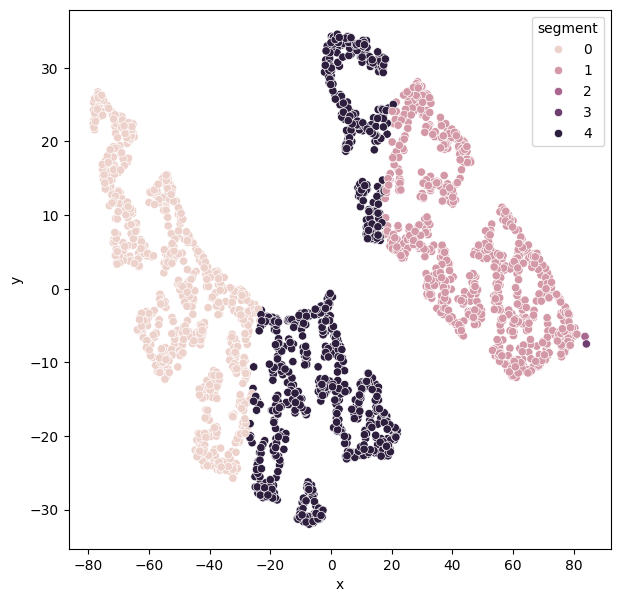

In [92]:
plt.figure(figsize=(7, 7))
# Create a DataFrame with the tsne_data and segments
df_tsne = pd.DataFrame({'x': tsne_data[:, 0], 'y': tsne_data[:, 1], 'segment': segments})
# Use the DataFrame in the scatterplot function
sns.scatterplot(x='x', y='y', hue='segment', data=df_tsne)
plt.show()